In [1]:
import pandas as pd

In [2]:
# CSVファイルの読み込み
financial_data = pd.read_csv('simulation_data/ch04_financial_data.csv')

# 行数の確認
print(len(financial_data))

# 冒頭N行の表示
financial_data.head(10)

7920


,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA,OL,FO
0,2015,1,1,5261.40,437.49,NaN,286.64,13005.55,3543.43,4372.96,2480.72
1,2016,1,1,5948.96,564.14,50.667498,513.48,13865.58,4642.16,4534.22,3959.70
2,2017,1,1,6505.06,691.18,29.543157,661.64,13952.58,7743.99,5111.22,6159.02
3,2018,1,1,6846.38,751.29,86.486500,664.80,18818.48,7284.72,5137.28,10123.91
4,2019,1,1,7572.24,958.53,298.049774,660.48,18190.00,9735.13,5487.96,11362.22
5,2020,1,1,7537.63,778.37,-65.458772,843.83,20462.86,10274.25,5371.38,13772.15
6,2015,2,1,3505.75,45.82,5.751119,40.07,2977.82,2258.33,1840.35,2340.89
7,2016,2,1,3491.27,51.25,1.876541,49.37,3184.80,1881.83,1769.17,2215.87
8,2017,2,1,3945.66,83.43,7.527881,75.90,3392.20,2425.21,1955.26,2727.35
9,2018,2,1,4139.33,93.40,6.816627,86.58,3569.31,2331.02,2022.12,2694.50


In [3]:
# film_IDとindustory_IDをカテゴリカル型に変換
financial_data['firm_ID'] = financial_data['firm_ID'].astype('category')
financial_data['industry_ID'] = financial_data['industry_ID'].astype('category')

# 確認
print(financial_data.dtypes)

year              int64
firm_ID        category
industry_ID    category
sales           float64
OX              float64
NFE             float64
X               float64
OA              float64
FA              float64
OL              float64
FO              float64
dtype: object


In [4]:
# 要約統計量の表示
print(financial_data.describe())

              year         sales             OX            NFE              X  \
count  7920.000000  7.920000e+03    7920.000000    7919.000000    7920.000000   
mean   2017.542803  1.660070e+05    7968.907795      64.020924    7904.875920   
std       1.705620  3.819803e+05   25951.564775    5941.342438   26910.184133   
min    2015.000000  2.053400e+02 -353606.720000 -285383.869863 -357624.830000   
25%    2016.000000  1.610333e+04     399.277500     -66.428412     383.270000   
50%    2018.000000  4.043074e+04    1602.880000      -1.186762    1586.095000   
75%    2019.000000  1.183138e+05    5260.460000      41.359527    5204.602500   
max    2020.000000  3.496433e+06  398034.500000  331035.251520  572588.730000   

                 OA            FA            OL            FO  
count  7.920000e+03  7.920000e+03  7.920000e+03  7.920000e+03  
mean   1.522728e+05  8.018535e+04  5.026088e+04  7.068061e+04  
std    4.538792e+05  4.228521e+05  1.486024e+05  2.906257e+05  
min    2.16510

In [5]:
# year列の固有要素を抽出
print(financial_data['year'].unique())

[2015 2016 2017 2018 2019 2020]


In [6]:
# firmID及びindustry_IDの固有要素数をカウント
print(len(financial_data['firm_ID'].unique()))
print(len(financial_data['industry_ID'].unique()))

1515
10


In [7]:
# 各行の欠損の有無を判定
print(financial_data.isnull().any(axis=1).sum())
# 欠損値の数をカウント
print(financial_data.isnull().sum())
# 欠損値の行を削除
financial_data = financial_data.dropna()
# 欠損値の行を削除した後の行数を確認
print(len(financial_data))
# 欠損値の行を削除した後の冒頭N行を表示
print(financial_data.head(10))


1
year           0
firm_ID        0
industry_ID    0
sales          0
OX             0
NFE            1
X              0
OA             0
FA             0
OL             0
FO             0
dtype: int64
7919
    year firm_ID industry_ID    sales      OX         NFE       X        OA  \
1   2016       1           1  5948.96  564.14   50.667498  513.48  13865.58   
2   2017       1           1  6505.06  691.18   29.543157  661.64  13952.58   
3   2018       1           1  6846.38  751.29   86.486500  664.80  18818.48   
4   2019       1           1  7572.24  958.53  298.049774  660.48  18190.00   
5   2020       1           1  7537.63  778.37  -65.458772  843.83  20462.86   
6   2015       2           1  3505.75   45.82    5.751119   40.07   2977.82   
7   2016       2           1  3491.27   51.25    1.876541   49.37   3184.80   
8   2017       2           1  3945.66   83.43    7.527881   75.90   3392.20   
9   2018       2           1  4139.33   93.40    6.816627   86.58   3569.31   
10 

In [8]:
# 2015年のデータのみ抽出
financial_data_2015 = financial_data[financial_data['year'] == 2015]

In [9]:
# 2015年のデータの戦闘10行を表示
print(financial_data_2015.head(10))

    year firm_ID industry_ID      sales        OX         NFE         X  \
6   2015       2           1    3505.75     45.82    5.751119     40.07   
12  2015       3           1  440789.92  -8246.19  188.315260  -8434.51   
18  2015       4           1   39725.12    440.42   -3.504138    443.93   
24  2015       5           1  420761.86  11191.47 -862.817207  12054.29   
30  2015       6           1   26110.53  -2403.60  102.445290  -2506.05   
35  2015       7           1   38978.69    281.63  -41.119439    322.75   
45  2015       9           1   47104.43    360.20    4.519993    355.68   
51  2015      10           1   36600.75    739.09   58.243279    680.84   
57  2015      11           1  412144.70  15742.11  -35.562808  15777.67   
63  2015      12           1    4033.07     17.36  -11.900917     29.26   

           OA        FA         OL        FO  
6     2977.82   2258.33    1840.35   2340.89  
12   69759.59  63529.92   31278.65   8390.50  
18   16626.50  15754.00    4980.0

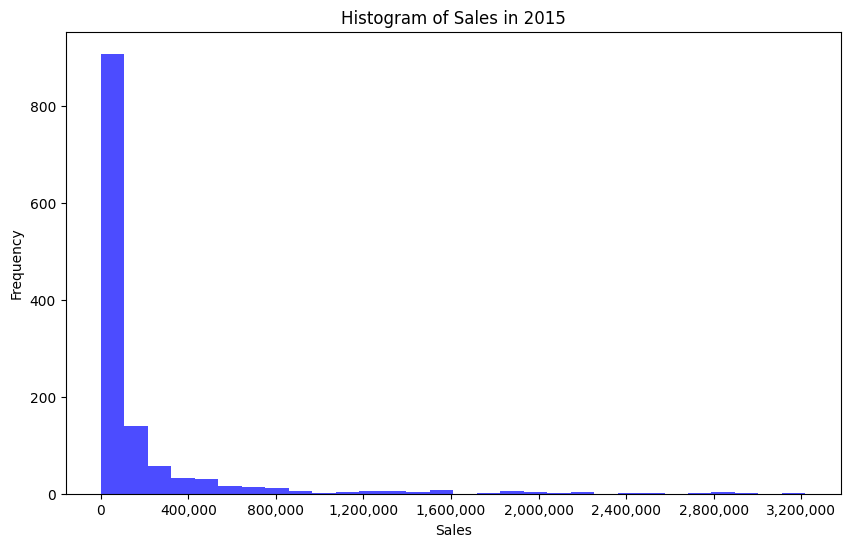

In [11]:
# 2015年度のデータの売上高をヒストグラムに表示
# X軸は10進数表記にする
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(financial_data_2015['sales'], bins=30, color='blue', alpha=0.7)
# X軸の目盛りを10進数表記にする
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
# X軸の目盛りを10進数表記にする
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# X軸のラベル
plt.xlabel('Sales')
# Y軸のラベル
plt.ylabel('Frequency')
# タイトル
plt.title('Histogram of Sales in 2015')
# グラフの表示
plt.show()